# Heart Data Analysis | Python Notebook

## Initial Analysis

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns

In [138]:
heart_data = pd.read_csv("heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [99]:
# Retrieve all possible values for each of the categorical and discrete columns
for column in heart_data:
    if heart_data[column].nunique() > 6:
        continue
    print(f"Possible values of {column}: {heart_data[column].unique().tolist()}")

Possible values of sex: [1, 0]
Possible values of cp: [0, 1, 2, 3]
Possible values of fbs: [0, 1]
Possible values of restecg: [1, 0, 2]
Possible values of exang: [0, 1]
Possible values of slope: [2, 0, 1]
Possible values of ca: [2, 0, 1, 3, 4]
Possible values of thal: [3, 2, 1, 0]
Possible values of target: [0, 1]


In [100]:
# Retrieve a brief statistical summary of each continuous column
for column in heart_data:
    if heart_data[column].nunique() < 6:
        continue
    # Get a statistical summary of the column
    summary = heart_data[column].describe().to_dict()
    # Doesn't have range, so I will add it here
    summary['range'] = summary['max'] - summary['min']
    print(f"Statistical Summary of {column}: {summary}")

Statistical Summary of age: {'count': 1025.0, 'mean': 54.43414634146342, 'std': 9.072290233244278, 'min': 29.0, '25%': 48.0, '50%': 56.0, '75%': 61.0, 'max': 77.0, 'range': 48.0}
Statistical Summary of trestbps: {'count': 1025.0, 'mean': 131.61170731707318, 'std': 17.516718005376408, 'min': 94.0, '25%': 120.0, '50%': 130.0, '75%': 140.0, 'max': 200.0, 'range': 106.0}
Statistical Summary of chol: {'count': 1025.0, 'mean': 246.0, 'std': 51.59251020618206, 'min': 126.0, '25%': 211.0, '50%': 240.0, '75%': 275.0, 'max': 564.0, 'range': 438.0}
Statistical Summary of thalach: {'count': 1025.0, 'mean': 149.11414634146342, 'std': 23.005723745977207, 'min': 71.0, '25%': 132.0, '50%': 152.0, '75%': 166.0, 'max': 202.0, 'range': 131.0}
Statistical Summary of oldpeak: {'count': 1025.0, 'mean': 1.0715121951219515, 'std': 1.175053255150176, 'min': 0.0, '25%': 0.0, '50%': 0.8, '75%': 1.8, 'max': 6.2, 'range': 6.2}


#### Continuous Columns:
* age
* trestbps (Resting Blood Pressure in mm Hg)
* chol (Serum Cholesterol in mm/dL)
* thalach (Maximum Recorded Heartrate)
* oldpeak (ST Depression after exercise)
#### Categorical Columns:
* sex (0 = Female, 1 = Male)
* fbs Fasting Blood Sugar (0 = <120 mg/dL; 1 = >120 mg/dL)
* restecg (Resting Electrocardiographic Results 0,1 or 2)
* exang (Exercise Induced Angina; 0 = False, 1 = True)
* slope (Slope of peak exercise ST segment; 0, 1, or 2)
* thal (Thallesemia; 1 = None, 2 = Fixed, 3 = Reversable)
* target (Heart Disease Status; 0 = False, 1 = True)
#### Discrete Columns
* cp (Reported Chest Pain; Scale of 0, 1, 2, or 3)
* ca (# Major Vessels Colored by Flourosopy; 0, 1, 2, 3, or 4)

In [89]:
# Create correlation matrix to find relationships between continuous data
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


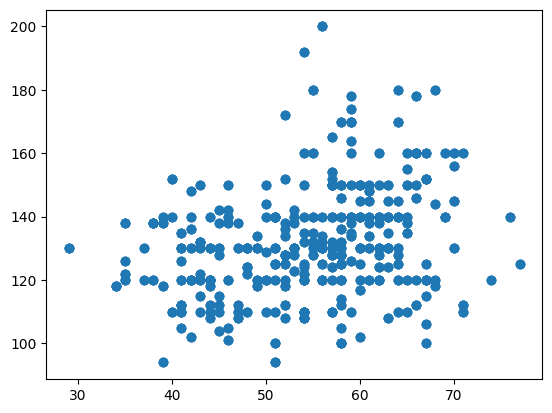

In [90]:
plt.scatter(heart_data["age"], heart_data["trestbps"])

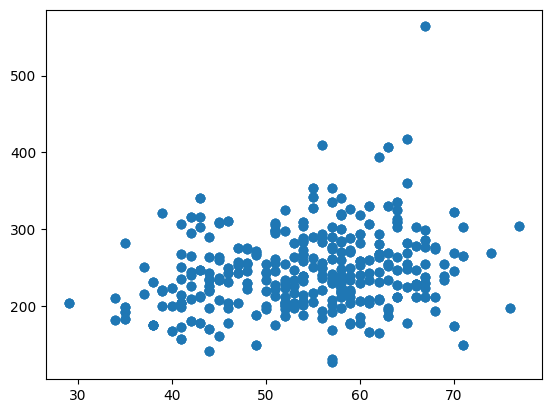

In [101]:
plt.scatter(heart_data["age"], heart_data["chol"])

#### KMeans Analysis

Text(0, 0.5, 'Inertia Score')

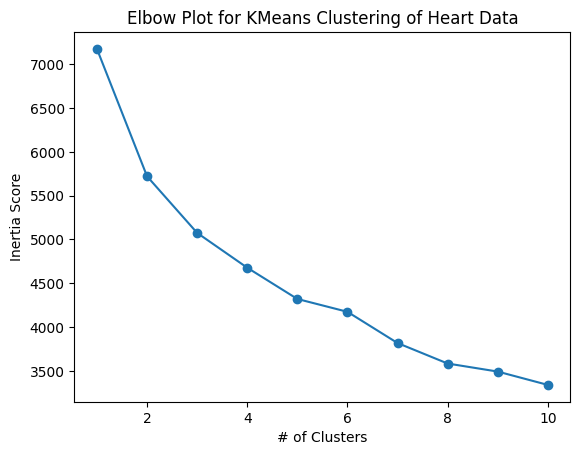

In [145]:
# Using all categorical & discrete numeric columns for KMeans to find related clusters
X = heart_data[['age','cp','trestbps','chol','thalach','oldpeak','ca']]

# Scale the data
Z = X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

inertia_values = []

for n in range(1,11):
    kmeans = KMeans(n_clusters=n, n_init='auto')
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_values, marker="o")
plt.title("Elbow Plot for KMeans Clustering of Heart Data")
plt.xlabel("# of Clusters")
plt.ylabel("Inertia Score")

Text(0, 0.5, 'Silhouette Score')

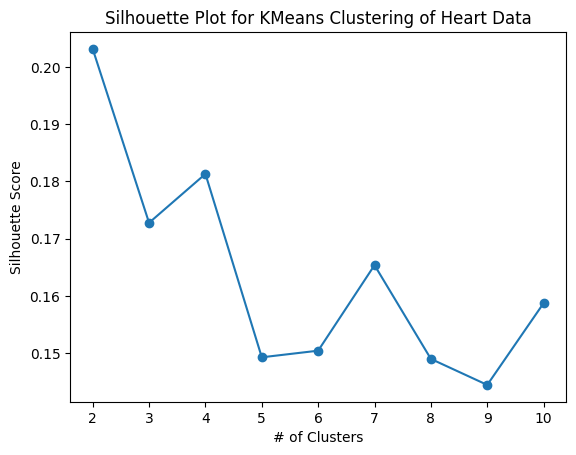

In [146]:
silhouette_values = []
for n in range(2,11):
    kmeans = KMeans(n_clusters=n, n_init="auto")
    kmeans.fit(X)
    silhouette_values.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2,11), silhouette_values, marker="o")
plt.title("Silhouette Plot for KMeans Clustering of Heart Data")
plt.xlabel("# of Clusters")
plt.ylabel("Silhouette Score")

In [147]:
# From the two plots, I've landed on 2 clusters as ideal. The elbow plot suggests 3 or 4, but the silhouette plot suggests 2 might be ideal,
# and since heart disease is the main topic of the dataset, it logically makes more sense to use 2 clusters as patients either have
# heart disease or they don't.
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')

kmeans.fit(X)

clusters = kmeans.labels_

Text(0, 0.5, 'ST Depression after Exercise')

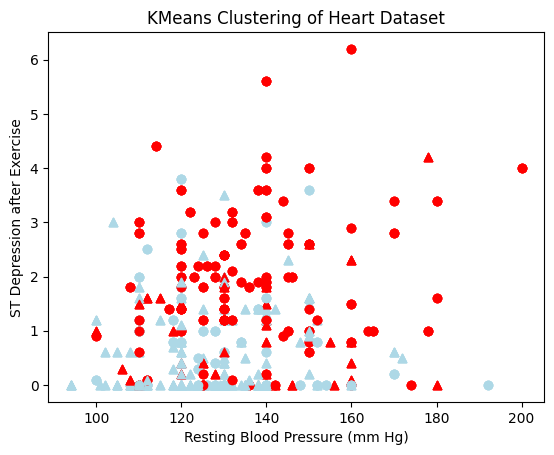

In [158]:
colors = ["red", "lightblue", "black"]
markers = ["o", "^", "x"]
for i in range(len(clusters)):
    plt.scatter(Z['trestbps'][i], Z['oldpeak'][i], color=colors[clusters[i]], marker = markers[y[i]])

plt.title("KMeans Clustering of Heart Dataset")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("ST Depression after Exercise")

## Research Questions
* Can an individual's heart data be used to predict if they have heart disease?
* How can resting blood pressure be predicted by other data in the dataset?
* Do men and women show the same symptom patterns for heart disease?

### Research Question #1
Can an individual's heart data be used to predict if they have heart disease?
* From the correlation matrix: reported chest pain, maximum heartrate, difference of st Depression, excercise induced angina, and thallasemia status look to be statistically significant

In [180]:
# Create a categorical column in the data for heart disease status
heart_data["Heart Disease"] = heart_data['target'].replace(to_replace={0:'Normal',1:'Heart Disease'})
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Normal
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Normal
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Normal
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Normal
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Heart Disease
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Normal
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Normal
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Heart Disease


Text(0, 0.5, 'Reported Chest Pain (0-3)')

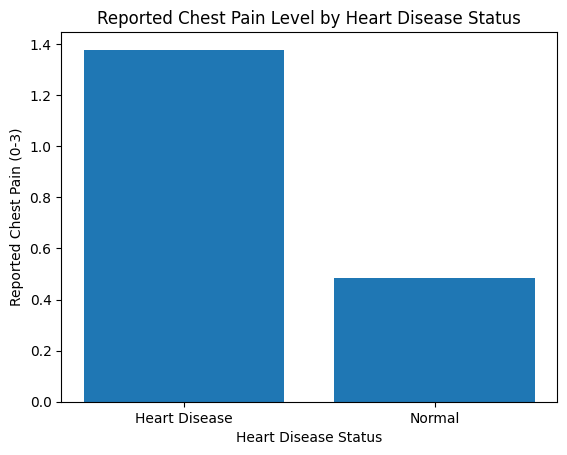

In [181]:
chest_pain_avg = heart_data.groupby(by="Heart Disease")["cp"].mean()
plt.bar(chest_pain_avg.index, chest_pain_avg)
plt.title("Reported Chest Pain Level by Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Reported Chest Pain (0-3)")

Text(0, 0.5, 'Maximum Heartrate (BPM)')

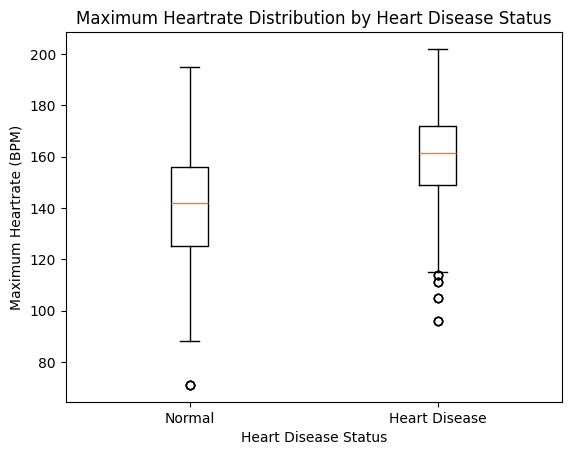

In [184]:
thalach_disease = heart_data.loc[heart_data["Heart Disease"] == "Heart Disease", "thalach"]
thalach_normal = heart_data.loc[heart_data["Heart Disease"] == "Normal", "thalach"]

plt.boxplot([thalach_normal, thalach_disease], tick_labels=["Normal", "Heart Disease"])
plt.title("Maximum Heartrate Distribution by Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Maximum Heartrate (BPM)")

Text(0, 0.5, 'Average ST Depression (mm)')

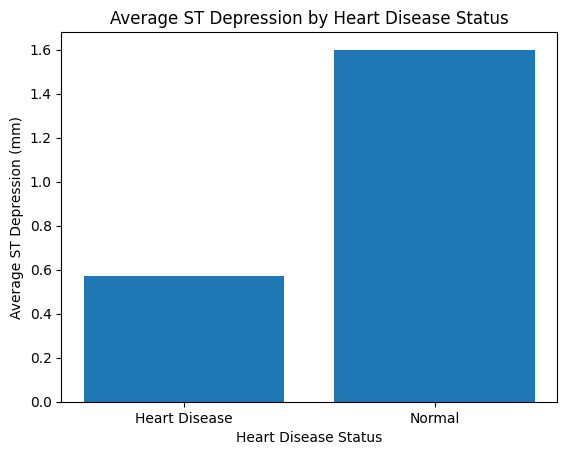

In [183]:
st_avg = heart_data.groupby(by="Heart Disease")['oldpeak'].mean()
plt.bar(st_avg.index, st_avg)
plt.title("Average ST Depression by Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Average ST Depression (mm)")

Text(0.5, 0, 'Heart Disease Status')

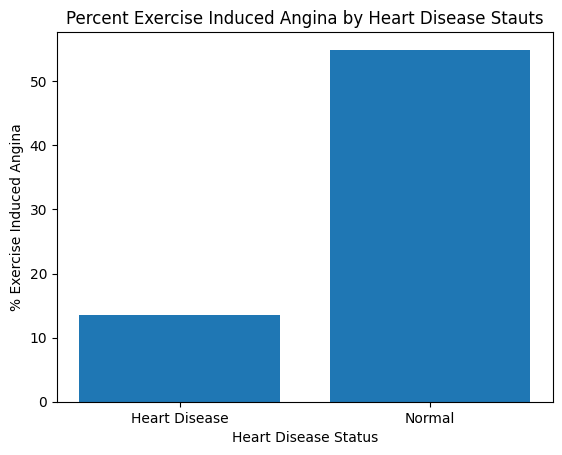

In [63]:
pct_angina = heart_data.groupby(by="Heart Disease")['exang'].mean()*100
plt.bar(pct_angina.index, pct_angina)
plt.title("Percent Exercise Induced Angina by Heart Disease Stauts")
plt.ylabel("% Exercise Induced Angina")
plt.xlabel("Heart Disease Status")

In [83]:
heart_disease_data = heart_data[heart_data["target"]==1]
normal_data = heart_data[heart_data["target"]==0]

heart_disease_len = len(heart_disease_data)
normal_len = len(normal_data)

def getPct(num,total):
    return f"{str((num/total)*100)}%"

heart_disease_no_thal = len(heart_disease_data[heart_disease_data["thal"]==1])
heart_disease_fixed_thal = len(heart_disease_data[heart_disease_data["thal"]==2])
heart_disease_reversable_thal = len(heart_disease_data[heart_disease_data["thal"]==3])

normal_no_thal = len(normal_data[normal_data["thal"]==1])
normal_fixed_thal = len(normal_data[normal_data["thal"]==2])
normal_reversable_thal = len(normal_data[normal_data["thal"]==3])

print("For those with heart disease:\n", getPct(heart_disease_no_thal,heart_disease_len), "No thallesemia\n",
      getPct(heart_disease_fixed_thal,heart_disease_len), "Fixed thallesemia\n",
      getPct(heart_disease_reversable_thal, heart_disease_len), "Reversable thallesemia\n\nFor those without heart disease:\n",
      getPct(normal_no_thal,normal_len),"No thallesemia\n",
      getPct(normal_fixed_thal,normal_len),"Fixed Thallesemia\n",
      getPct(normal_reversable_thal,normal_len),"Reversable Thallesemia")

For those with heart disease:
 3.9923954372623576% No thallesemia
 78.32699619771863% Fixed thallesemia
 17.110266159695815% Reversable thallesemia

For those without heart disease:
 8.617234468937877% No thallesemia
 26.452905811623246% Fixed Thallesemia
 64.12825651302605% Reversable Thallesemia


In [171]:
### Build a KNN Model to predict heart disease
# Output of the target column, heart disease
y = heart_data["target"]
# Inputs of reported chest pain level (scale of 0-3), thalach (maximum heartrate achieved in BPM), and oldpeak (Slope of ST Depression after
# exercise)
input_cols = ["cp", "thalach","oldpeak"]
X = heart_data[input_cols]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
### Create KNN Model by iterating through 1-10 neighbors to find which yields best results
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("K:", k, "Accuracy Score:", accuracy)

K: 1 Accuracy Score: 0.975609756097561
K: 2 Accuracy Score: 0.9707317073170731
K: 3 Accuracy Score: 0.926829268292683
K: 4 Accuracy Score: 0.8390243902439024
K: 5 Accuracy Score: 0.7804878048780488
K: 6 Accuracy Score: 0.8048780487804879
K: 7 Accuracy Score: 0.824390243902439
K: 8 Accuracy Score: 0.8195121951219512
K: 9 Accuracy Score: 0.824390243902439


Text(0.5, 1.0, 'Confusion Matrix of Heart Disease Predictive Model Results')

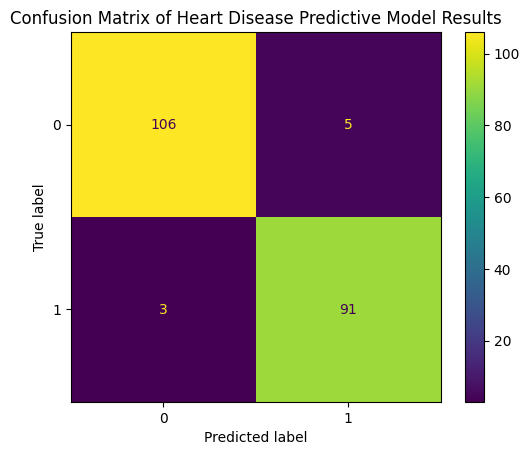

In [186]:
# 1 Neighbor yields the most consistent & accurate results, likely because the data includes few outliers and the signs are clear
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("Confusion Matrix of Heart Disease Predictive Model Results")

### Research Question #1 Answer
* Heart Disease Status can predicted with reasonable accuracy using reported chest pain levels, maximum heartrate, and difference of ST depression following exercise
#### Notes
* K Nearest Neighbors is able to create a consistent & accurate predictive model
* Using 1 neighbor yields the best results with the data

### Research Question #3
Do men and women show the same symptom patterns with heart disease?

In [159]:
heart_data_female = heart_data[heart_data["sex"]==0]
heart_data_male = heart_data[heart_data["sex"]==1]

In [163]:
print(len(heart_data_female))
print(len(heart_data_male))

312
713


* Note that there are 401 more male entries than female

In [168]:
print(heart_data_female['age'].describe())
print(heart_data_male['age'].describe())

count    312.000000
mean      55.849359
std        9.368127
min       34.000000
25%       50.000000
50%       57.000000
75%       63.000000
max       76.000000
Name: age, dtype: float64
count    713.000000
mean      53.814867
std        8.875668
min       29.000000
25%       47.000000
50%       55.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64


* Outside of count, the age distribution shows that the age data is relatively similar, which should create a relatively fair comparison

In [169]:
heart_data_female.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,NaN,-0.034137,0.285237,0.245419,0.121813,-0.023220,-0.398580,0.016232,0.177608,-0.068097,0.396325,0.139838,-0.211631
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,-0.034137,NaN,1.000000,-0.169804,-0.058375,-0.002605,0.063838,0.125035,-0.438389,-0.292676,0.290840,-0.266175,-0.259052,0.528722
trestbps,0.285237,NaN,-0.169804,1.000000,0.155917,0.256267,-0.027643,-0.110635,0.336117,0.407165,-0.269237,0.299440,0.204853,-0.403454
chol,0.245419,NaN,-0.058375,0.155917,1.000000,0.142235,-0.275413,0.031480,0.096857,0.133614,0.122457,0.108348,0.263531,-0.146422
fbs,0.121813,NaN,-0.002605,0.256267,0.142235,1.000000,-0.185634,-0.157549,0.199544,0.128480,0.028046,0.279415,0.046189,-0.240064
restecg,-0.023220,NaN,0.063838,-0.027643,-0.275413,-0.185634,1.000000,-0.076667,0.034163,-0.086004,0.082549,-0.139334,0.004192,0.042678
thalach,-0.398580,NaN,0.125035,-0.110635,0.031480,-0.157549,-0.076667,1.000000,-0.131511,-0.248607,0.333531,-0.149663,-0.152554,0.260568
exang,0.016232,NaN,-0.438389,0.336117,0.096857,0.199544,0.034163,-0.131511,1.000000,0.192398,-0.284409,0.042683,0.248055,-0.499202
oldpeak,0.177608,NaN,-0.292676,0.407165,0.133614,0.128480,-0.086004,-0.248607,0.192398,1.000000,-0.598444,0.461194,0.372906,-0.516610


In [170]:
heart_data_male.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,NaN,-0.095000,0.254897,0.181337,0.126290,-0.198243,-0.400779,0.140136,0.237449,-0.218775,0.246401,0.083511,-0.295792
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,-0.095000,NaN,1.000000,0.133690,-0.115771,0.112094,0.031664,0.366451,-0.386584,-0.125084,0.069715,-0.141711,-0.132693,0.409397
trestbps,0.254897,NaN,0.133690,1.000000,0.084470,0.151104,-0.186638,-0.015061,-0.045645,0.090643,-0.052294,0.036574,0.034909,-0.059249
chol,0.181337,NaN,-0.115771,0.084470,1.000000,-0.032859,-0.083457,-0.068829,0.103499,0.055222,-0.108491,0.099886,0.107375,-0.183869
fbs,0.126290,NaN,0.112094,0.151104,-0.032859,1.000000,-0.065619,0.043891,-0.009479,-0.039054,-0.095921,0.085754,-0.075509,0.041499
restecg,-0.198243,NaN,0.031664,-0.186638,-0.083457,-0.065619,1.000000,0.095328,-0.098109,-0.027103,0.086091,-0.046524,-0.014598,0.160366
thalach,-0.400779,NaN,0.366451,-0.015061,-0.068829,0.043891,0.095328,1.000000,-0.456189,-0.382942,0.416400,-0.220341,-0.075213,0.481708
exang,0.140136,NaN,-0.386584,-0.045645,0.103499,-0.009479,-0.098109,-0.456189,1.000000,0.344409,-0.259955,0.110139,0.156956,-0.392280
oldpeak,0.237449,NaN,-0.125084,0.090643,0.055222,-0.039054,-0.027103,-0.382942,0.344409,1.000000,-0.565982,0.128368,0.140951,-0.402052


In [175]:
X_female = heart_data_female[input_cols]
y_female = heart_data_female["target"]
female_preds = knn.predict(X_female)
acc = accuracy_score(female_preds,y_female)
print("Model's Accuracy on Female Data Only:", acc)

Model's Accuracy on Female Data Only: 0.9647435897435898


In [176]:
X_male = heart_data_male[input_cols]
y_male = heart_data_male["target"]
male_preds = knn.predict(X_male)
acc = accuracy_score(male_preds,y_male)
print("Model's Accuracy on Male Data Only:", acc)

Model's Accuracy on Male Data Only: 0.9761570827489481


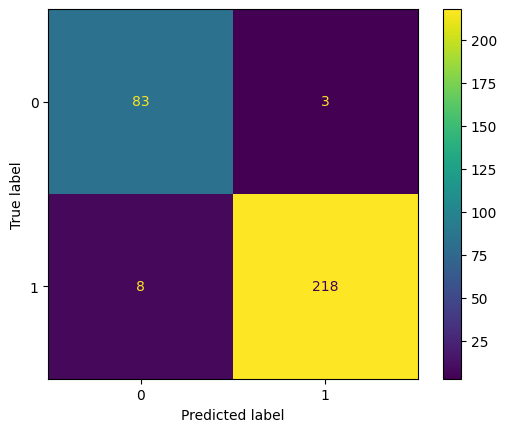

In [177]:
X_female = heart_data_female[input_cols]
y_female = heart_data_female["target"]
ConfusionMatrixDisplay.from_estimator(knn, X_female, y_female)

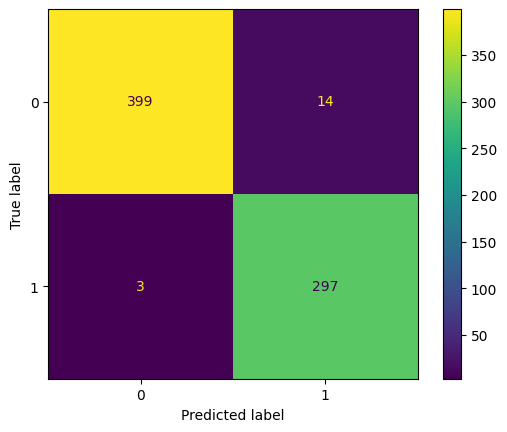

In [178]:
X_male = heart_data_male[input_cols]
y_male = heart_data_male["target"]
ConfusionMatrixDisplay.from_estimator(knn, X_male, y_male)

* The accuracy scores of the model on male & female data is relatively similar, but slightly more acccurate on males.
* The difference observed above does make sense as the data used to create the model is significantly male-biased
* But the females tended to incorrectly predict that they did not have heart disease more often than incorrectly predicting the other way, and opposite for males. Why is this?


My first thought is that the females from the data may have a different distribution of the input columns; which would make sense as genetic differences between sex do exist and can cause slight differences in what ranges are generally considered normal or healthy one compared to the other